<a href="https://colab.research.google.com/github/rehavelu/Projects/blob/main/MNIST%20Handwritten%20Digits%20Recognition%20-%20Image_Classification/MNIST_Handwritten_Digits_Recognition_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install tensorflow-gpu keras

In [ ]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from tensorflow.keras.utils import img_to_array, load_img
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

In [ ]:
!unzip Train_UQcUa52.zip

Streaming output truncated to the last 5000 lines.
 extracting: Images/train/55.png     
 extracting: Images/train/550.png    
 extracting: Images/train/5500.png   
 extracting: Images/train/5501.png   
 extracting: Images/train/5502.png   
 extracting: Images/train/5503.png   
 extracting: Images/train/5504.png   
 extracting: Images/train/5505.png   
 extracting: Images/train/5506.png   
 extracting: Images/train/5507.png   
 extracting: Images/train/5508.png   
 extracting: Images/train/5509.png   
 extracting: Images/train/551.png    
 extracting: Images/train/5510.png   
 extracting: Images/train/5511.png   
 extracting: Images/train/5512.png   
 extracting: Images/train/5513.png   
 extracting: Images/train/5514.png   
 extracting: Images/train/5515.png   
 extracting: Images/train/5516.png   
 extracting: Images/train/5517.png   
 extracting: Images/train/5518.png   
 extracting: Images/train/5519.png   
 extracting: Images/train/552.png    
 extracting: Images/train/5520.png   

In [ ]:
df = pd.read_csv('train.csv')
df.head()

filename  label
0    0.png      4
1    1.png      9
2    2.png      1
3    3.png      7
4    4.png      3

In [ ]:
!pwd

/content


In [ ]:
image_path = 'Images/train/'

In [ ]:
X = np.array([img_to_array(load_img(image_path+df['filename'][i], target_size=(28,28,1), grayscale=True))
              for i in tqdm(range(df.shape[0]))
              ]).astype('float32')

  0%|          | 0/49000 [00:00<?, ?it/s]

In [ ]:
y = df['label']

In [ ]:
print(X.shape, y.shape)

(49000, 28, 28, 1) (49000,)


## Exploratory Data Analysis

4


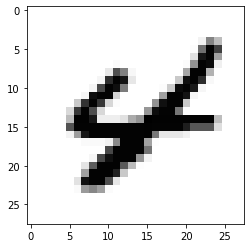

In [ ]:
image_index = 0
print(y[image_index])
plt.imshow(X[image_index].reshape(28,28), cmap='Greys')

2


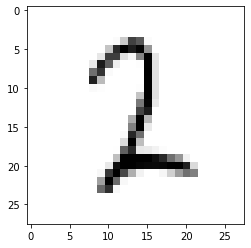

In [ ]:
image_index = 10
print(y[image_index])
plt.imshow(X[image_index].reshape(28,28), cmap='Greys')

7


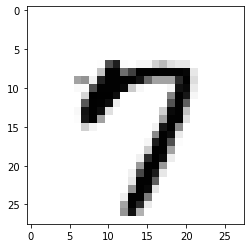

In [ ]:
image_index = 100
print(y[image_index])
plt.imshow(X[image_index].reshape(28,28), cmap='Greys')

## Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=np.array(y))

In [ ]:
x_train /= 255
x_test /= 255

## Model Creation

In [ ]:
input_shape = (28,28,1)
output_class = 10

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# define the model
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.3))
model.add(Dense(output_class, activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
# train the model
model.fit(x=x_train, y=y_train, batch_size=32, epochs=30, validation_data=(x_test, y_test))

Epoch 1/30
1149/1149 [==============================] - 16s 5ms/step - loss: 0.2743 - accuracy: 0.9183 - val_loss: 0.1162 - val_accuracy: 0.9637
Epoch 2/30
1149/1149 [==============================] - 4s 4ms/step - loss: 0.1178 - accuracy: 0.9647 - val_loss: 0.0801 - val_accuracy: 0.9746
Epoch 3/30
1149/1149 [==============================] - 4s 4ms/step - loss: 0.0840 - accuracy: 0.9742 - val_loss: 0.0745 - val_accuracy: 0.9755
Epoch 4/30
1149/1149 [==============================] - 5s 4ms/step - loss: 0.0647 - accuracy: 0.9791 - val_loss: 0.0709 - val_accuracy: 0.9789
Epoch 5/30
1149/1149 [==============================] - 4s 4ms/step - loss: 0.0539 - accuracy: 0.9821 - val_loss: 0.0729 - val_accuracy: 0.9789
Epoch 6/30
1149/1149 [==============================] - 4s 4ms/step - loss: 0.0450 - accuracy: 0.9850 - val_loss: 0.0669 - val_accuracy: 0.9812
Epoch 7/30
1149/1149 [==============================] - 5s 4ms/step - loss: 0.0377 - accuracy: 0.9871 - val_loss: 0.0663 - val_accuracy

## Testing the model

1/1 [==============================] - 0s 119ms/step
Predicted output: 1


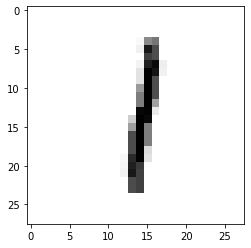

In [ ]:
image_index = 10
# print("Original output:",y_test[image_index])
plt.imshow(x_test[image_index].reshape(28,28), cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1,28,28,1))
print("Predicted output:", pred.argmax())

1/1 [==============================] - 0s 21ms/step
Predicted output: 8


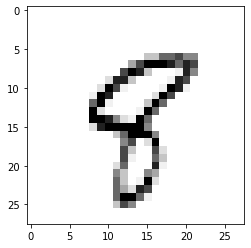

In [ ]:
image_index = 100
# print("Original output:",y_test[image_index])
plt.imshow(x_test[image_index].reshape(28,28), cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1,28,28,1))
print("Predicted output:", pred.argmax())